In [1]:
from functions import *

In [2]:
fi = np.genfromtxt('inds.txt')

In [3]:
slices = np.array([0, 200, 400, 600, 800, 1000, 1200, 1400, 1497, 1545, 1568])

In [4]:
# nfi = fi[slices[-2]:slices[-1]]
nfi = fi
nfi.shape

(1568, 228)

In [5]:
main = np.empty((nfi.shape[0], 0))

In [6]:
for i in range(9):
    opts = np.array([])
    for halo in nfi:
        M = halo[1]
        Rvir = halo[2]
        mask = np.where(RADIUS < Rvir)
        obs = halo[3+(i*BIN_NO):3+((i+1)*BIN_NO)]
        obs = obs[mask]
        # c_inv = np.diag((0.25 * obs) ** 2)
        try:
            c_inv = cinv(obs, 0.25)
            optres = iminuit.minimize(
                cost, [np.log(10)], args=(obs, c_inv, M, Rvir, "abs")
            )
            opts = np.append(opts, optres.x)
        except np.linalg.LinAlgError:
            # pass
            opts = np.append(opts, np.nan)
    opts = opts.reshape(-1, 1)
    # print(opts.shape)

    main = np.column_stack((main, opts))

# print(main.shape)
# main = main[~np.isnan(main).any(axis=1), :]
print(main.shape)

E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMe

In [7]:
meanjk = np.mean(main[:, 1:], axis=1)
stdjk = np.std(main[:, 1:], axis=1)
main = np.column_stack((main, stdjk, meanjk))
main.shape

(1568, 11)

In [8]:
se_jk = se_jack(main[:, 1:-2], main[:, -1], 8)
main = np.column_stack((main, se_jk))
main.shape

(1568, 12)

In [9]:
np.savetxt('eps_all_test_abs.out', main)

In [ ]:
len(se_jk > 10)

array([False, False, False, ..., False, False, False])

Text(0, 0.5, 'N')

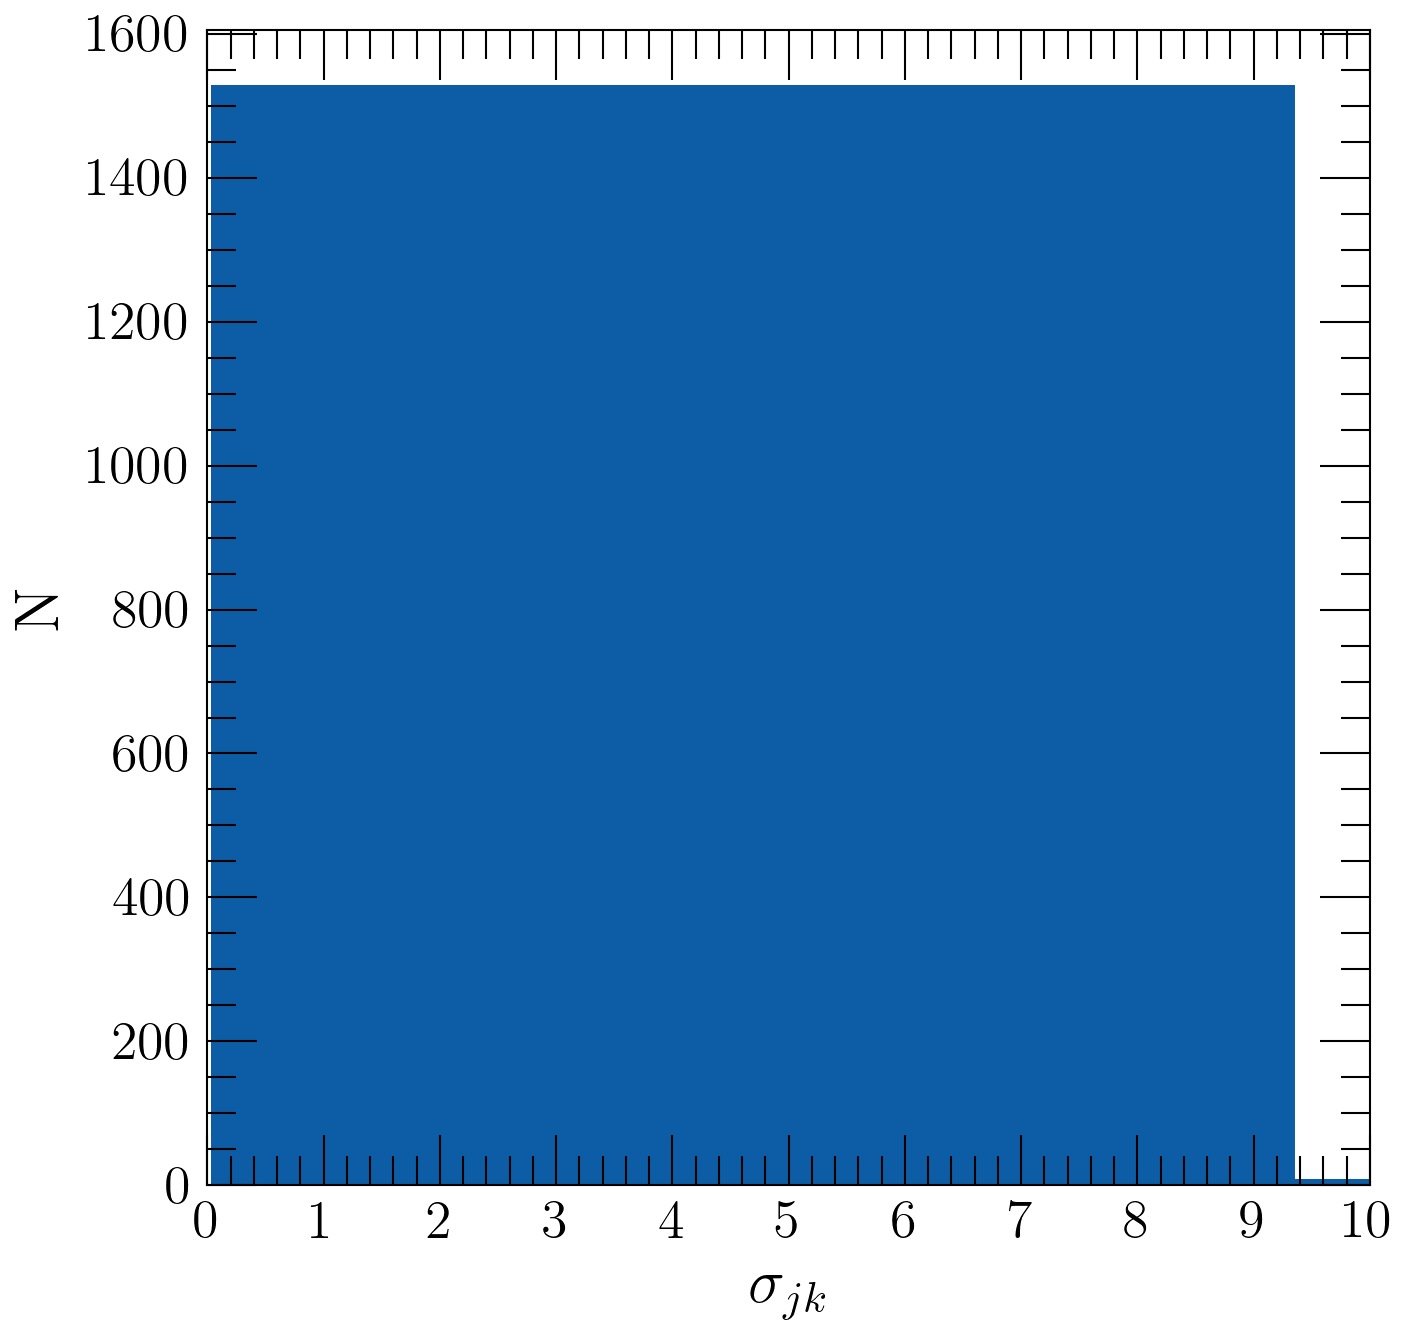

In [11]:
plt.hist(se_jk, bins=20)
plt.xlim(0, 10)
plt.xticks(np.arange(0, 11, 1))
plt.xlabel('$\sigma_{jk}$')
plt.ylabel('N')

In [13]:
def best_eps(fi, slices, eps, loss: str):
    # plt.rcParams['xtick.direction'] = 'out'
    # plt.rcParams['ytick.direction'] = 'out'
    # fig = plt.figure(figsize=(20, 20))
    # plt.tight_layout(w_pad=3)
    # i = 1
    se = np.array([])
    for bin in range(slices.shape[0] - 1):
        print('bin', bin)
        nfi = fi[slices[bin]:slices[bin+1]]

        main = np.empty((nfi.shape[0], 0))

        for jack in range(9):
            print('bin', bin, 'jack',jack)
            opts = np.array([])
            for halo in nfi:
                M = halo[1]
                Rvir = halo[2]

                mask = np.where(RADIUS < Rvir)

                obs = halo[3+(jack*BIN_NO):3+((jack+1)*BIN_NO)]
                obs = obs[mask]

                try:
                    c_inv = cinv(obs, eps)
                    optres = iminuit.minimize(
                            cost, [np.log(10)], args=(obs, c_inv, M, Rvir, loss)
                        )
                    # optres = scipy.optimize.minimize(
                    #     cost, [np.log(10)], args=(obs, c_inv, M, Rvir, loss
                    # ))
                    opts = np.append(opts, optres.x)
                except np.linalg.LinAlgError:
                    # pass
                    opts = np.append(opts, np.nan)

            opts = opts.reshape(-1, 1)
            main = np.column_stack((main, opts))

        # drop nan (det 0)
        main = main[~np.isnan(main).any(axis=1), :]
        meanjk = np.mean(main[:, 1:], axis=1)
        main = np.column_stack((main, meanjk))

        se_jk = se_jack(main[:, 1:-1], main[:, -1], 8)
        main = np.column_stack((main, se_jk))
        se = np.append(se, np.mean(se_jk))

        # plt.subplot(5, 5, i)
        # i += 1
        # plt.hist(se_jk, bins=20)
        # plt.xlim(0, 10)
        # plt.xticks(np.arange(0, 11, 1))
        # plt.xlabel('$\sigma_{jk}$')
        # plt.ylabel('N')
        # plt.title(bin + 1)
    # plt.show()
    # plt.savefig(f'{eps}.png')
    return se

In [14]:
dummy = np.arange(0.01, 0.26, 0.01)
len(dummy)

25

In [15]:
allse = np.genfromtxt('test_eps.out')
# allse = np.array([])
for e in dummy:
    print('eps', e)
    se = best_eps(fi, slices, e, "abs")
    if not allse.size > 0:
        allse = se.reshape(-1, 1)
    else:
        se = se.reshape(-1, 1)
        allse = np.column_stack((allse, se))
    np.savetxt('test_eps.out', allse)
allse.shape

/tmp/ipykernel_8932/1303354361.py:1: UserWarning: genfromtxt: Empty input file: "test_eps.out"
  allse = np.genfromtxt('test_eps.out')


eps 0.01
bin 0
bin 0 jack 0
bin 0 jack 1
bin 0 jack 2
bin 0 jack 3
bin 0 jack 4
bin 0 jack 5
bin 0 jack 6
bin 0 jack 7


KeyboardInterrupt: 

In [ ]:
allse.shape

(10, 10)

In [ ]:
fi2 = allse

In [2]:
fi2 = np.genfromtxt('test_eps_abs.out')
fi2.shape

(10, 25)

In [3]:
avgm = (MASS_BINS[1:] + MASS_BINS[:-1])/2

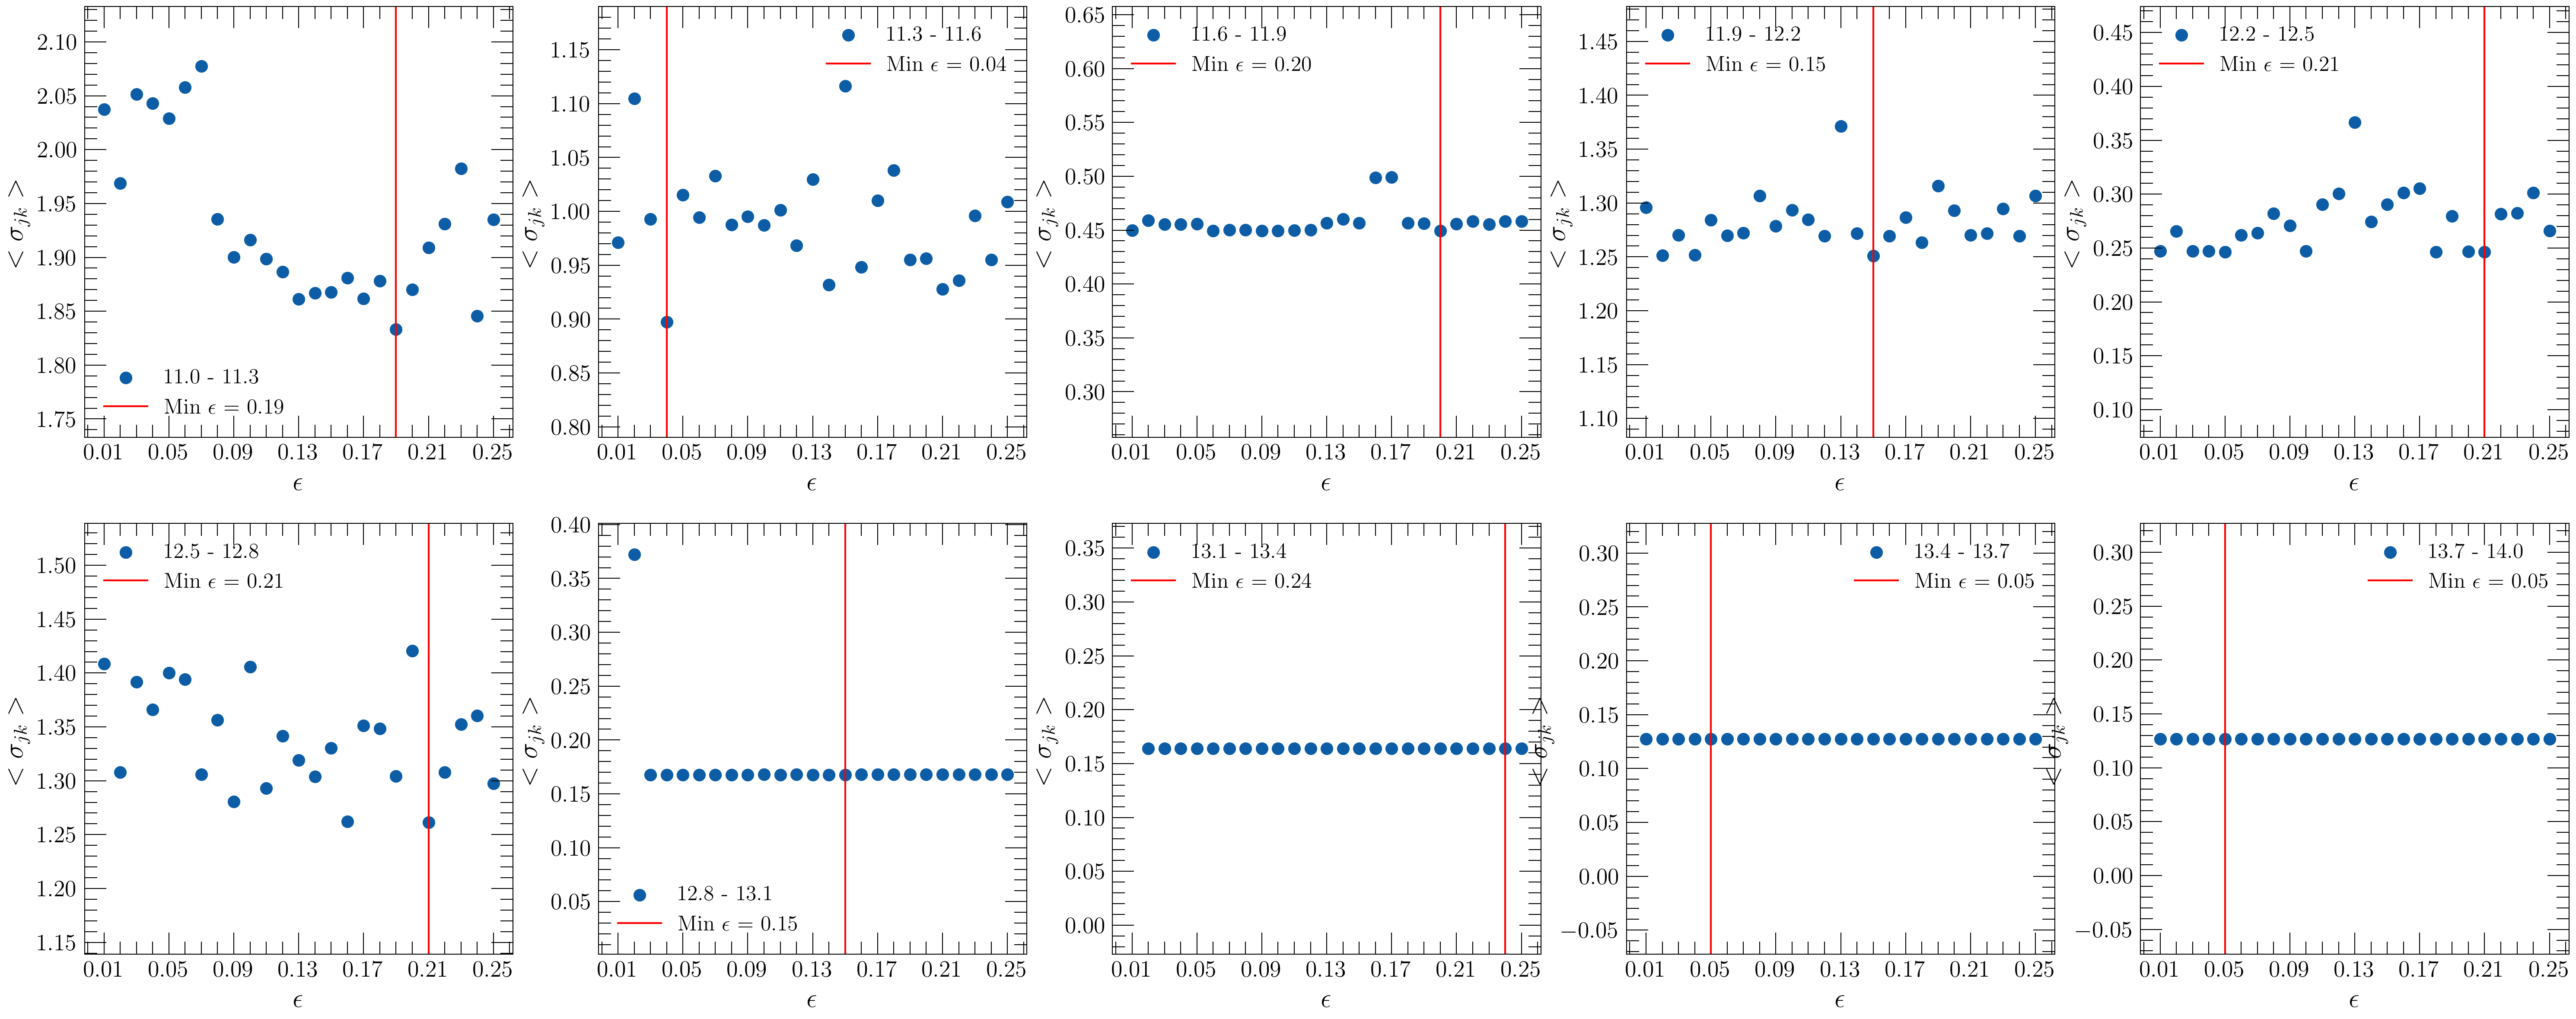

In [6]:
dummy = np.arange(0.01, 0.26, 0.01)
fig, _ = plt.subplots(figsize=(20, 20))
fig.tight_layout()
for i in range(10):
    mi = np.argmin(fi2[i, :])
    plt.subplot(5, 5, i+1)
    plt.scatter(dummy[:], fi2[i, :], label=f'{np.log10(MASS_BINS[i])} - {np.log10(MASS_BINS[i+1])}')
    plt.axvline(dummy[mi], color='r', label=f'Min $\epsilon$ = {dummy[mi]:.2f}')
    plt.ylabel(r'$< \sigma_{jk} >$')
    plt.xlabel(r'$\epsilon$')
    mea = np.mean(fi2[i, :])
    plt.ylim(mea-.2, mea+.2)
    plt.xticks(dummy[::4])
    plt.legend()
plt.show()